<a href="https://colab.research.google.com/github/vidya100804/DEEP-LEARNING-EXPERIMENTS/blob/main/Exp_9_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.random import seed
seed(0xdeadbeef)
import tensorflow as tf
tf.random.set_seed(0xdeadbeef)
from tensorflow import keras
imdb = keras.datasets.imdb
num_words = 20000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(seed=1,
num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(train_data[0])
print('label:', train_labels[0])

[1, 13, 28, 1039, 7, 14, 23, 1856, 13, 104, 36, 4, 699, 8060, 144, 297, 14, 175, 291, 18, 4, 375, 1784, 153, 38, 15, 75, 92, 859, 51, 16, 5, 15, 75, 377, 24, 8, 81, 4, 172, 2497, 174, 40, 1489, 49, 84, 11, 4, 2030, 3039, 121, 36, 92, 4881, 14, 20, 2, 9, 40, 6, 2, 621, 18, 148, 37, 191, 1941, 42, 511, 14, 20, 9, 17, 76, 253, 17, 269, 8, 3336, 4, 2, 8, 1278, 6, 543, 2647, 10, 10, 308, 3102, 2, 47, 43, 188, 46, 7, 1172, 5, 240, 2854, 145, 8, 4, 154, 3243, 11, 4819, 58, 18, 35, 32, 8, 327, 823, 7, 7350, 7, 265, 308, 1828, 145, 1646, 4, 154, 890, 5, 9, 14412, 34, 362, 2515, 154, 1914, 5, 27, 15227, 2, 17, 36, 837, 5, 1941, 32, 367, 4, 96, 10, 10, 13, 62, 386, 14, 48, 13, 16, 3178, 42, 48, 11, 882, 294, 16, 3412, 2, 4360, 2, 34, 6, 1042, 18, 2, 345, 96, 14, 9, 6, 862, 526, 3757, 917, 5, 60, 1055, 13, 115, 197, 474, 1829, 15, 2006, 7, 6791, 113, 19, 4, 2, 261, 13, 104, 4, 1653, 173, 7, 4, 65, 143, 4, 3801, 1366, 548, 844, 5, 4, 837, 1396, 27, 369, 459, 44, 68, 4731, 5, 181, 8, 607, 4, 6791, 3

In [3]:
vocabulary = imdb.get_word_index()
vocabulary = {k:(v+3) for k,v in vocabulary.items()}
vocabulary["<PAD>"] = 0

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
vocabulary["<START>"] = 1
vocabulary["<UNK>"] = 2
vocabulary["<UNUSED>"] = 3

In [8]:
index = dict([(value, key) for (key, value) in vocabulary.items()])
def decode_review(text):

    return ''.join([index.get(i, '?') for i in text])
decode_review(train_data[0])

"<START>ihavecopyofthisonvhsithinktheythetelevisionnetworksshouldplaythiseveryyearforthenexttwentyyearssothatwedon'tforgetwhatwasandthatweremembernottodothesamemistakesagainlikeputtingsomepeopleinthedirector'schairwheretheydon'tbelongthismovie<UNK>islikea<UNK>musicalforthosewhocan'tsingoractthismovieisasmuchfunastryingtoteachthe<UNK>todriveacitybusbrbrjohnhood<UNK>hasjustgotoutofprisonandhe'sheadedbacktotheoldneighborhoodinservingtimeforanalltonicecrimeofnecessityofcoursejohnheadsbackontotheoldstreetandisgreetedbykidsdogsoldladiesandhispeer<UNK>astheydanceandsingallalongthewaybrbriwouldrecommendthisifiwassentimentalorifintruthsomeonewassmoking<UNK>pot<UNK>byadoctorfor<UNK>eitherwaythisisapoorlydirectedscriptedactedandevenproducedineverthoughti'dsatthatsatireofghettolifewiththe<UNK>althoughithinktheredeemingpartofthestorythroughthewannabegangfightsequencesandthedancenumbershisfriendscareabouttheirneighborsandwanttosavetheghettofrombeingtorndownandcleanedupbrbrforgetsonnyspoonmariocouldh

In [10]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,

value=vocabulary["<PAD>"],
padding='post',
maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,

value=vocabulary["<PAD>"],padding='post',
maxlen=256)
train_data[1]

array([    1,   103,   450,   576,    73,  2896,     8,     4,   213,
           7,   897,    13,    16,   576,  3521,    19,     4,    22,
           4,    22,    16,   465,   728,     4,  2563,     4,  1460,
           4,  3237,     5,     6,    55,   576,  1078,  2734,    10,
          10,    13,    69,  2721,   873,     8,    67,   111,   318,
         302,     5,    40,     6, 13892,     2,    12,  4280,    72,
         245,    19,     4,  4211,     5,     4,     2,     7,    12,
        1620,    13,   244,   174,  2654,   245,    19,   129,  7102,
          19,     4,   979,     7,     4,    65,     5,   129,   459,
           7,     4,   318,   302,    25,    80,   140,     6,   196,
          96,    61,   464,    13,    80,   407,    30,     4,  2217,
           7,   129,   337,  1333,    10,    10,  2127,     2,     4,
         118,   284,  1344,    16,     4,   612,    31,  1099,    25,
          93,  1792,  7606,   168,    40,     6,   506,  1079,     8,
           2,    10,

In [11]:
model = keras.Sequential()
model.add(keras.layers.Embedding(len(vocabulary), 2, input_length=256))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.summary()
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(train_data,

train_labels,
epochs=5,
batch_size=100,
validation_data=(test_data, test_labels),
verbose=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5400 - loss: 0.6854 - val_accuracy: 0.7767 - val_loss: 0.5342
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7962 - loss: 0.4691 - val_accuracy: 0.8639 - val_loss: 0.3435
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8600 - loss: 0.3279 - val_accuracy: 0.8756 - val_loss: 0.3068
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8868 - loss: 0.2725 - val_accuracy: 0.8770 - val_loss: 0.2969
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9037 - loss: 0.2407 - val_accuracy: 0.8723 - val_loss: 0.2989


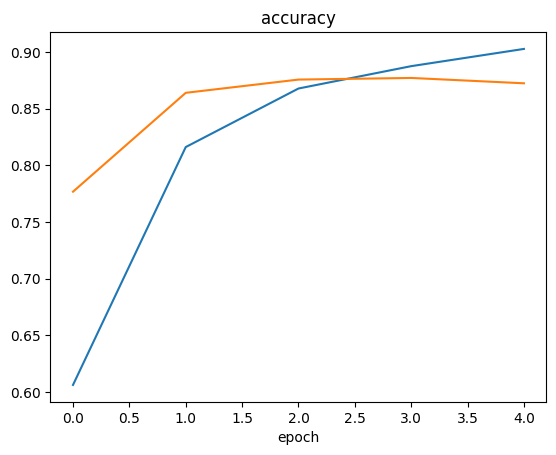

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt


def plot_accuracy(history, miny=None):

    acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    epochs = range(len(acc))
    plt.plot(epochs, acc)
    plt.plot(epochs, test_acc)
    if miny:
        plt.ylim(miny, 1.0)
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.figure()
plot_accuracy(history)